In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
! cd ~/.kaggle/

In [6]:
! pwd

/content


In [7]:
! cp ./drive/MyDrive/Geo_AI/Kaggle_API/kaggle.json ~/.kaggle/

In [8]:
! ls ~/.kaggle/

kaggle.json


In [9]:
! chmod 600 ~/.kaggle/kaggle.json

In [10]:
! kaggle datasets download ubitquitin/geolocation-geoguessr-images-50k

Dataset URL: https://www.kaggle.com/datasets/ubitquitin/geolocation-geoguessr-images-50k
License(s): unknown
100% 6.66G/6.66G [01:11<00:00, 94.3MB/s]
100% 6.66G/6.66G [01:11<00:00, 100MB/s] 


In [11]:
! unzip geolocation-geoguessr-images-50k.zip

Streaming output truncated to the last 5000 lines.
  inflating: compressed_dataset/United States/canvas_1629857168.jpg  
  inflating: compressed_dataset/United States/canvas_1629857174.jpg  
  inflating: compressed_dataset/United States/canvas_1629857189.jpg  
  inflating: compressed_dataset/United States/canvas_1629857218.jpg  
  inflating: compressed_dataset/United States/canvas_1629857294.jpg  
  inflating: compressed_dataset/United States/canvas_1629857324.jpg  
  inflating: compressed_dataset/United States/canvas_1629857337.jpg  
  inflating: compressed_dataset/United States/canvas_1629857426.jpg  
  inflating: compressed_dataset/United States/canvas_1629857468.jpg  
  inflating: compressed_dataset/United States/canvas_1629857483.jpg  
  inflating: compressed_dataset/United States/canvas_1629857531.jpg  
  inflating: compressed_dataset/United States/canvas_1629857575.jpg  
  inflating: compressed_dataset/United States/canvas_1629857600.jpg  
  inflating: compressed_dataset/United 

In [12]:
# Cell 1: Setup – Imports, Device, and Basic Configurations
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms, models
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Since Colab shows you plenty of RAM (e.g., 334.6 GB available) and disk space,
# we can increase the batch size and use pin_memory to speed up data transfer.


Using device: cpu


In [13]:
# Cell 2: Data Transforms and Dataset Loading

# Use a lower resolution for faster processing
img_size = (128, 128)
# Increase batch size to use more RAM; adjust as needed based on your GPU memory.
batch_size = 256

train_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),  # Minimal augmentation for speed
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Set your dataset directory (ensure images are in subfolders by label)
data_dir = '/content/compressed_dataset'  # Update this path as needed

# Load the dataset using ImageFolder (folder names become labels)
full_dataset = datasets.ImageFolder(root=data_dir, transform=train_transform)
num_classes = len(full_dataset.classes)
print(f"Found {num_classes} classes: {full_dataset.classes}")

# Split the dataset (80% training, 20% validation)
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# For validation, use the validation transforms
val_dataset.dataset.transform = val_transform

# Create DataLoaders using more workers and pin_memory to leverage available resources
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                          num_workers=4, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,
                        num_workers=4, pin_memory=True)


Found 124 classes: ['Aland', 'Albania', 'American Samoa', 'Andorra', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Bangladesh', 'Belarus', 'Belgium', 'Bermuda', 'Bhutan', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Curacao', 'Czechia', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Eswatini', 'Faroe Islands', 'Finland', 'France', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Guam', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Japan', 'Jersey', 'Jordan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Lithuania', 'Luxembourg', 'Macao', 'Madagascar', 'Malaysia', 'Malta', 'Martinique', 'Mexico', 'Monaco', 'Mongolia', 'Montenegro', 'Mozambique', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Northern Mariana Islands', 'Norway', 'Pakistan', 

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [36]:
from collections import Counter

# Count images per class index
class_counts = Counter([label for _, label in full_dataset.samples])

# Create a mapping from class index to class name
idx_to_class = {idx: class_name for class_name, idx in full_dataset.class_to_idx.items()}

# Sort the counts by the number of images (descending order)
sorted_counts = sorted(class_counts.items(), key=lambda x: x[1], reverse=True)

print("Number of images per class (sorted by count descending):")
for class_idx, count in sorted_counts:
    print(f"{idx_to_class[class_idx]}: {count}")


Number of images per class (sorted by count descending):
United States: 12014
Japan: 3840
France: 3573
United Kingdom: 2484
Brazil: 2320
Russia: 1761
Australia: 1704
Canada: 1382
South Africa: 1183
Spain: 1075
Finland: 1049
Thailand: 944
Mexico: 901
Poland: 863
Italy: 789
Sweden: 726
Singapore: 707
Germany: 698
Argentina: 689
Norway: 675
Netherlands: 579
New Zealand: 557
Taiwan: 547
Malaysia: 423
Austria: 347
Romania: 346
Chile: 326
Israel: 326
Ireland: 290
Indonesia: 288
Peru: 270
Turkey: 268
Czechia: 257
Colombia: 251
Greece: 248
South Korea: 243
Portugal: 242
Belgium: 219
Philippines: 219
Bulgaria: 217
Denmark: 198
Switzerland: 173
Hungary: 168
India: 160
Botswana: 144
Lithuania: 140
Kenya: 130
Croatia: 129
Nigeria: 123
Cambodia: 118
Latvia: 117
Bolivia: 116
Ukraine: 114
Slovakia: 108
Ghana: 107
Bangladesh: 106
Estonia: 99
Ecuador: 93
Tunisia: 87
Jordan: 85
Sri Lanka: 85
Mongolia: 83
Guatemala: 79
Senegal: 75
Kyrgyzstan: 72
United Arab Emirates: 70
Hong Kong: 66
Slovenia: 66
Lesotho

In [14]:
# Cell 3: Model Setup

# Use a lightweight pre-trained model (MobileNetV2) for speed.
model = models.mobilenet_v2(pretrained=True)

# Freeze the feature extractor layers to speed up training.
for param in model.features.parameters():
    param.requires_grad = False

# Replace the classifier to match the number of classes.
in_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(in_features, num_classes)
model = model.to(device)

# Define loss function and optimizer.
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 74.7MB/s]


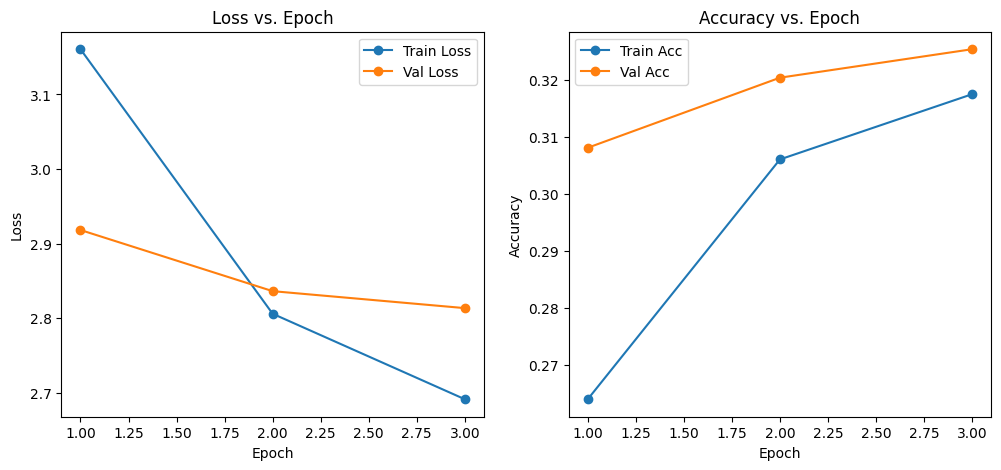

In [ ]:
# Cell 4: Training Loop with Visualization and Occasional Saving
num_epochs = 5  # Adjust as needed

# Lists to store metrics over epochs
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Per-batch progress bar with TQDM
    train_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    for images, labels in train_bar:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        # Update progress bar with current loss
        train_bar.set_postfix(loss=f"{loss.item():.4f}")

    # Compute training metrics for the epoch
    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = correct_train / total_train
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)

    # Validation Phase
    model.eval()
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item() * images.size(0)
            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    epoch_val_loss = running_val_loss / len(val_loader.dataset)
    epoch_val_acc = correct_val / total_val
    val_losses.append(epoch_val_loss)
    val_accs.append(epoch_val_acc)

    # Save the model state after each epoch
    save_path = f"model_epoch_{epoch+1}.pth"
    torch.save(model.state_dict(), save_path)
    print(f"Saved model checkpoint: {save_path}")

    # Visualize training progress so far
    clear_output(wait=True)
    plt.figure(figsize=(12, 5))

    # Plot Loss vs. Epoch
    plt.subplot(1, 2, 1)
    plt.plot(range(1, epoch+2), train_losses, label="Train Loss", marker='o')
    plt.plot(range(1, epoch+2), val_losses, label="Val Loss", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Loss vs. Epoch")
    plt.legend()

    # Plot Accuracy vs. Epoch
    plt.subplot(1, 2, 2)
    plt.plot(range(1, epoch+2), train_accs, label="Train Acc", marker='o')
    plt.plot(range(1, epoch+2), val_accs, label="Val Acc", marker='o')
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs. Epoch")
    plt.legend()

    plt.show()

    print(f"Epoch {epoch+1}/{num_epochs} | "
          f"Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f} | "
          f"Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_acc:.4f}")


<ipython-input-18-b7d1ec398f16>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(model_path, map_location=device))


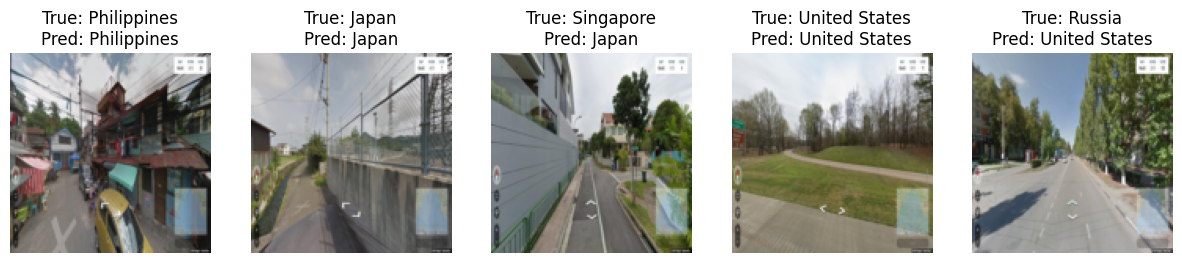

In [18]:
# Cell: Visualize Model Predictions on Sample Images
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Load the saved model state (adjust the file name as needed)
model_path = "/content/drive/MyDrive/Geo_AI/model_epoch_3.pth"  # Change to your checkpoint file
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()  # Set model to evaluation mode

# Helper function to unnormalize and show an image
def imshow(img, title=None):
    # img is a tensor in shape (C, H, W)
    img = img.cpu().numpy().transpose((1, 2, 0))
    # Unnormalize using the same mean and std used during training
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    plt.imshow(img)
    if title:
        plt.title(title)
    plt.axis("off")

# Choose a few random samples from the validation set
num_samples = 5
indices = random.sample(range(len(val_dataset)), num_samples)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    # Get an image and its true label from the validation dataset
    img, true_label = val_dataset[idx]

    # Prepare image: add batch dimension and move to device
    input_img = img.unsqueeze(0).to(device)

    # Make prediction
    with torch.no_grad():
        output = model(input_img)
        _, predicted = torch.max(output, 1)

    predicted_class = full_dataset.classes[predicted.item()]
    true_class = full_dataset.classes[true_label]

    plt.subplot(1, num_samples, i + 1)
    imshow(img, title=f"True: {true_class}\nPred: {predicted_class}")

plt.show()


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Classification Report:
                          precision    recall  f1-score   support

                 Albania       0.00      0.00      0.00         8
          American Samoa       0.00      0.00      0.00         1
                 Andorra       0.00      0.00      0.00         4
               Argentina       0.43      0.07      0.12       146
               Australia       0.34      0.19      0.24       319
                 Austria       0.50      0.20      0.29        74
              Bangladesh       0.50      0.10      0.17        20
                 Belgium       0.00      0.00      0.00        56
                  Bhutan       1.00      0.20      0.33         5
                 Bolivia       1.00      0.05      0.10        19
                Botswana       0.54      0.47      0.50        30
                  Brazil       0.28      0.32      0.30       473
                Bulgaria       0.75      0.08      0.15        37
                Cambodia       0.00      0.00      0

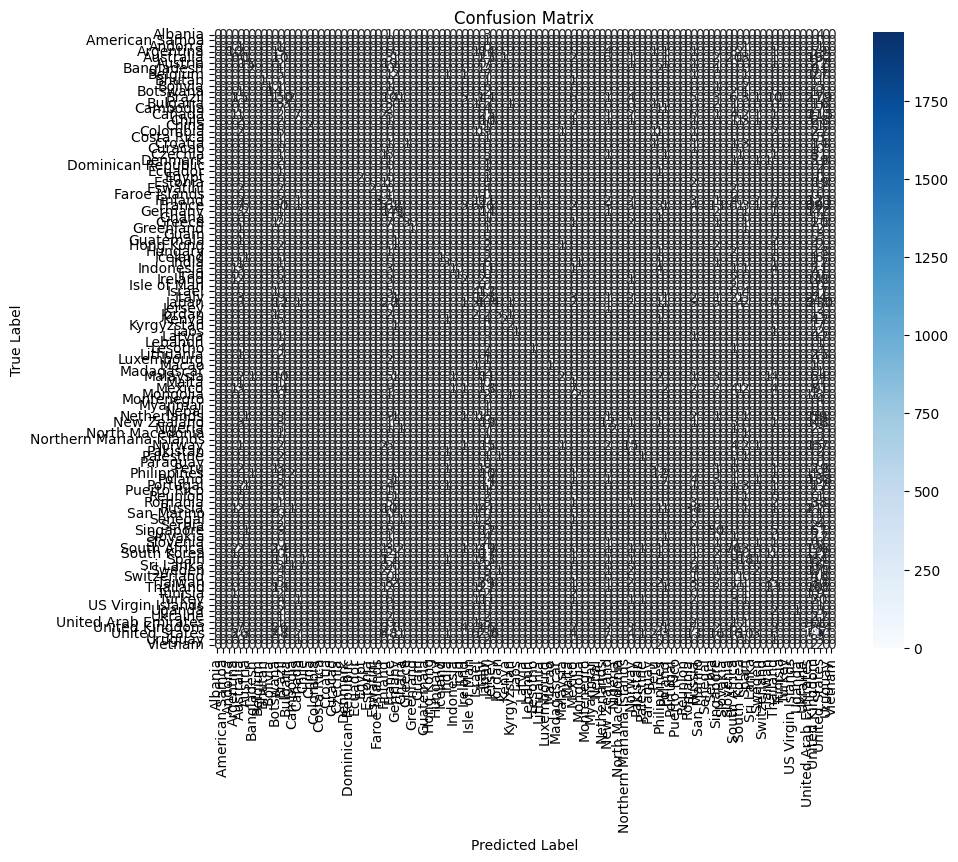

In [20]:
# Cell: Evaluate Model and Display Additional Metrics (Updated)

import sklearn.metrics as metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Collect all predictions and true labels from the validation set
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Determine the unique labels present in the validation set
unique_labels = sorted(set(all_labels))
# Create a list of class names corresponding to these labels
label_names = [full_dataset.classes[i] for i in unique_labels]

# Compute the confusion matrix using only the labels present in the validation set
cm = metrics.confusion_matrix(all_labels, all_preds, labels=unique_labels)

# Generate a classification report using the unique labels and corresponding names
report = metrics.classification_report(
    all_labels, all_preds,
    labels=unique_labels,
    target_names=label_names
)
print("Classification Report:")
print(report)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_names,
            yticklabels=label_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [22]:
import numpy as np
import pandas as pd
import sklearn.metrics as metrics

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Total number of samples from the confusion matrix
total = np.sum(cm)

# Overall accuracy (sum of diagonal divided by total)
overall_accuracy = np.trace(cm) / total
print(f"Overall Accuracy: {overall_accuracy:.4f}")

# Prepare a list to hold per-class metrics
metrics_list = []

# For each unique class (using one-vs-all approach)
for idx, label in enumerate(unique_labels):
    # True Positives: correct predictions for this class
    TP = cm[idx, idx]
    # False Positives: instances wrongly predicted as this class
    FP = np.sum(cm[:, idx]) - TP
    # False Negatives: instances of this class predicted as other classes
    FN = np.sum(cm[idx, :]) - TP
    # True Negatives: all other instances not in this class
    TN = total - (TP + FP + FN)

    # Compute precision, recall, and F1-score safely
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # For per-class accuracy, one common (but less-used) approach is:
    # (TP + TN) divided by total samples
    accuracy_class = (TP + TN) / total

    # Support is simply the number of true instances for this class.
    support = np.sum(cm[idx, :])

    metrics_list.append({
        "Class": label_names[idx],
        "TP": TP,
        "FP": FP,
        "FN": FN,
        "TN": TN,
        "Accuracy": accuracy_class,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "Support": support
    })

# Create a DataFrame for better visualization
df_metrics = pd.DataFrame(metrics_list)

# Optionally, sort by support (or any metric) to make it easier to inspect
df_metrics = df_metrics.sort_values(by="Support", ascending=False)
print(df_metrics)


Overall Accuracy: 0.3408
              Class    TP    FP   FN    TN  Accuracy  Precision    Recall  F1-Score  Support
105   United States  1970  3316  471  4243    0.6213   0.372683  0.807046  0.509900     2441
47            Japan   404   943  355  8298    0.8702   0.299926  0.532279  0.383666      759
30           France   162   355  565  8918    0.9080   0.313346  0.222834  0.260450      727
104  United Kingdom   178   579  317  8926    0.9104   0.235139  0.359596  0.284345      495
11           Brazil   150   392  323  9135    0.9285   0.276753  0.317125  0.295567      473
..              ...   ...   ...  ...   ...       ...        ...       ...       ...      ...
1    American Samoa     0     0    1  9999    0.9999   0.000000  0.000000  0.000000        1
65          Myanmar     0     0    1  9999    0.9999   0.000000  0.000000  0.000000        1
66            Nepal     0     0    1  9999    0.9999   0.000000  0.000000  0.000000        1
84       San Marino     0     0    1  9999   

In [23]:
df_metrics.to_csv("metrics.csv", index=False)

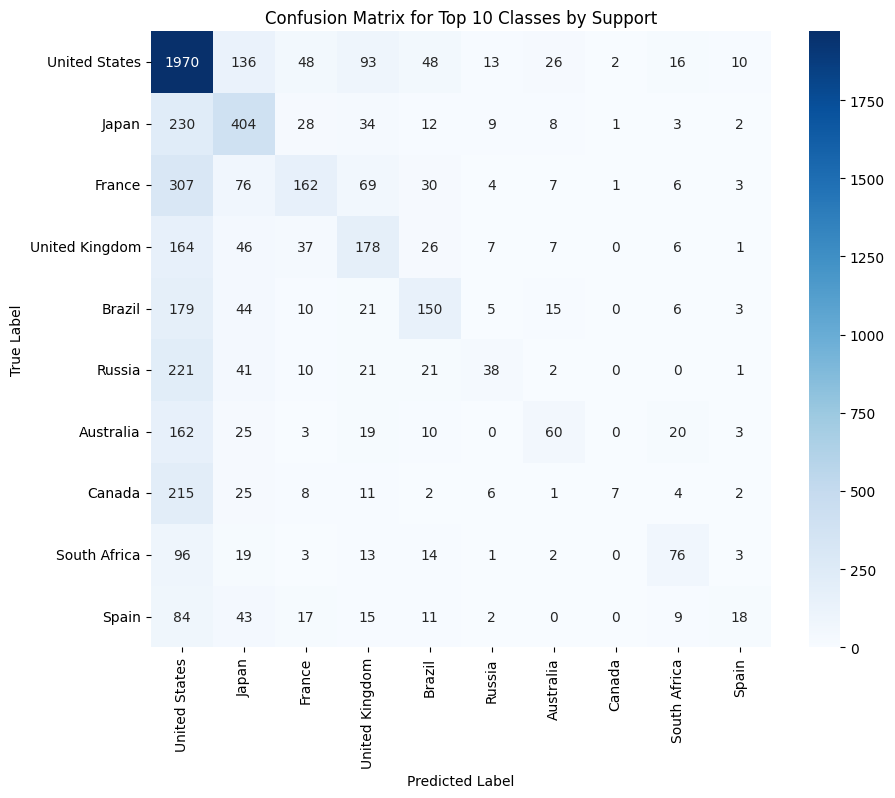

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

# 1. Extract top 10 classes by support from the metrics DataFrame
top10_df = df_metrics.sort_values('Support', ascending=False).head(10)
top10_class_names = top10_df['Class'].tolist()

# 2. Get the indices corresponding to these class names (based on full_dataset.classes)
top10_indices = [full_dataset.classes.index(cls) for cls in top10_class_names]

# 3. Recompute the confusion matrix for only these top 10 classes
cm_top10 = metrics.confusion_matrix(all_labels, all_preds, labels=top10_indices)

# 4. Plot the confusion matrix heatmap for the top 10 classes
plt.figure(figsize=(10, 8))
sns.heatmap(cm_top10, annot=True, fmt='d', cmap='Blues',
            xticklabels=top10_class_names,
            yticklabels=top10_class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Top 10 Classes by Support")
plt.show()


Saved Accuracy_bar_chart.png


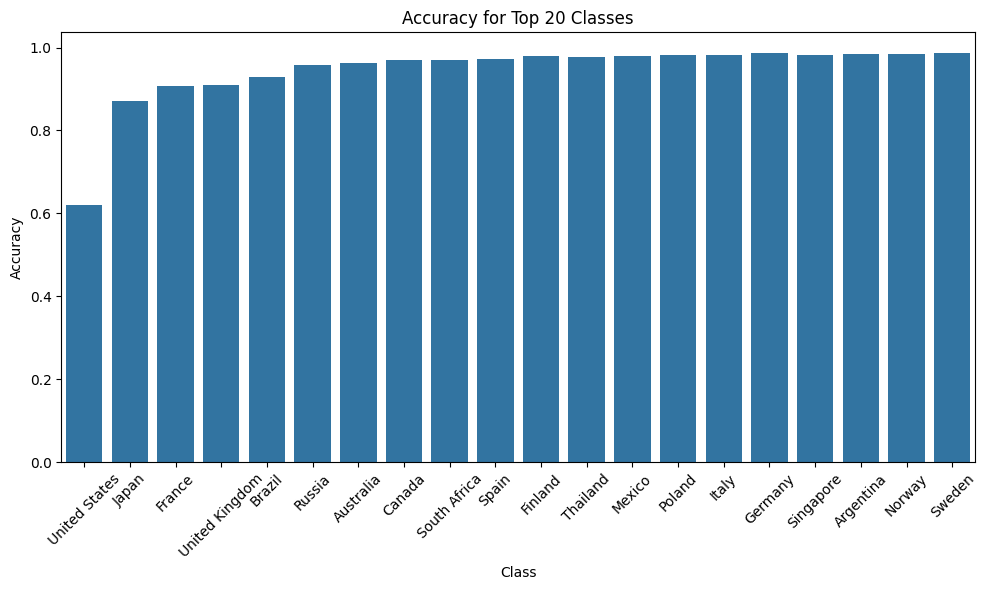

Saved Precision_bar_chart.png


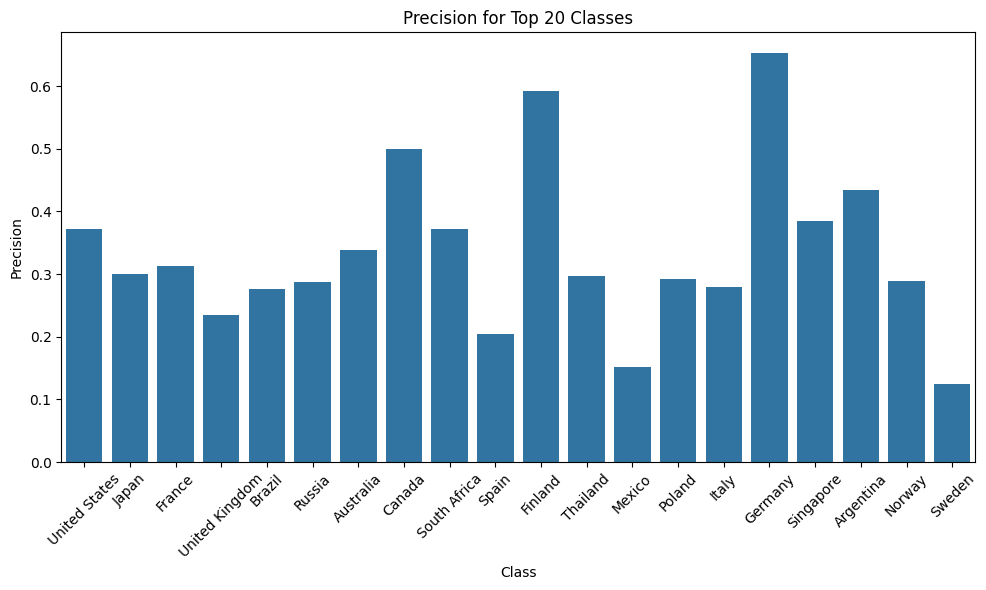

Saved Recall_bar_chart.png


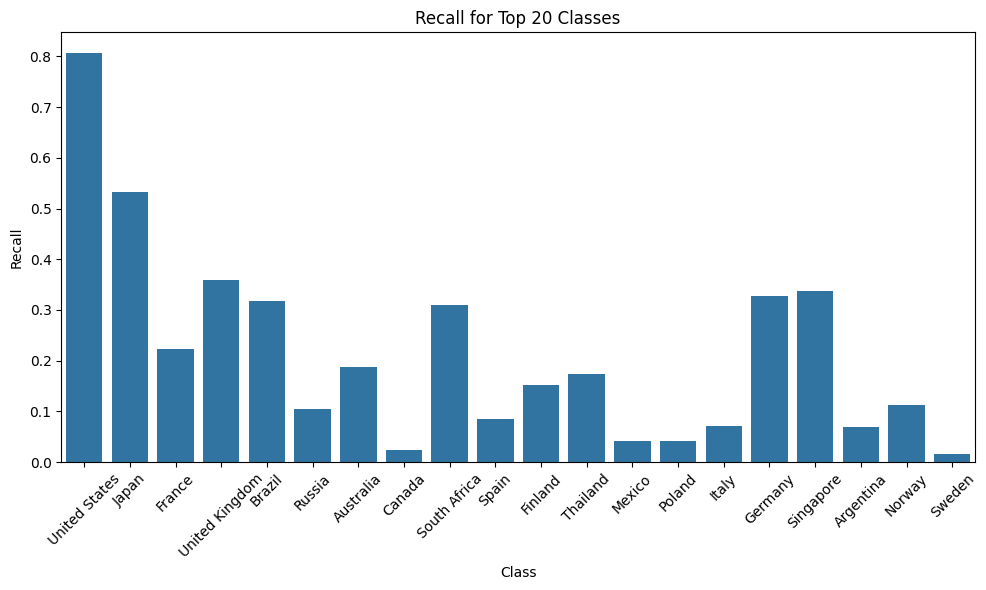

Saved F1-Score_bar_chart.png


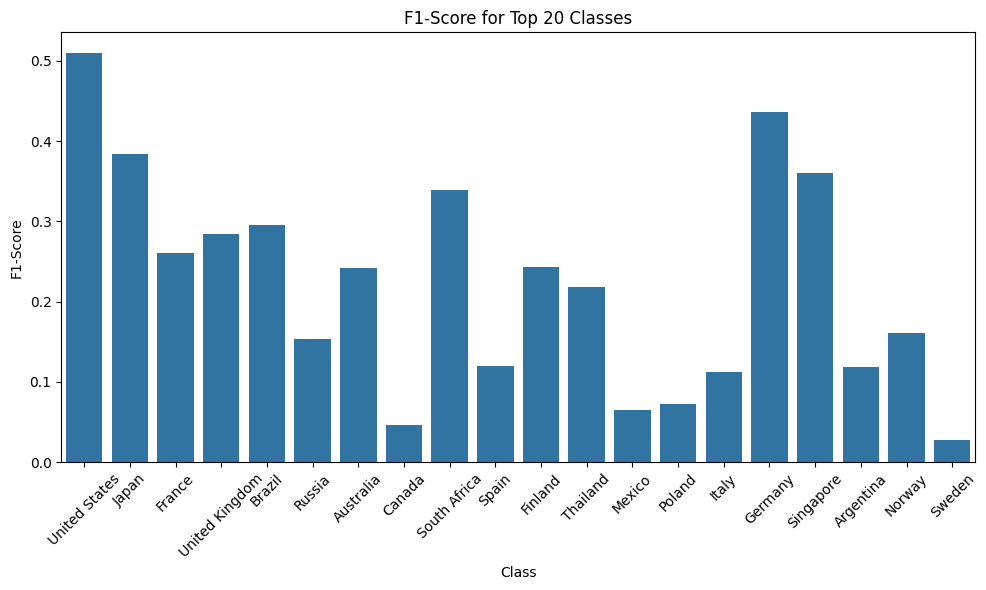

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure top20_df exists (top 20 classes by support)
top20_df = df_metrics.sort_values('Support', ascending=False).head(20)

# List of metrics you want to plot individually
metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score"]

for metric in metrics_to_plot:
    # Create a new figure for each metric
    plt.figure(figsize=(10, 6))

    # Plot the bar chart
    ax = sns.barplot(x="Class", y=metric, data=top20_df)
    ax.set_title(f"{metric} for Top 20 Classes")
    ax.set_xlabel("Class")
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()

    # Save the figure to a file (e.g., PNG file)
    filename = f"{metric}_bar_chart.png"
    plt.savefig(filename)
    print(f"Saved {filename}")

    # Display the figure
    plt.show()
